<a href="https://colab.research.google.com/github/Tecindes/ChallengeONE__/blob/main/TelecomX_parte2_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [356]:
import pandas as pd

In [357]:


# URL raw del archivo CSV (ajusta con tu repo y path)
url_csv = 'https://raw.githubusercontent.com/Tecindes/ChallengeONE__/refs/heads/main/reporte.csv'


# Cargar el CSV directamente como DataFrame
df = pd.read_csv(url_csv)

# Vista previa
df.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,SeniorLabel,ChurnLabel
1515,2226-ICFDO,No,Female,0,Yes,Yes,72,Yes,Yes,DSL,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.9,6110.75,No,0
6165,8734-FNWVH,No,Male,0,Yes,Yes,31,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Bank transfer (automatic),59.7,1825.50,No,0
1308,1941-HOSAM,No,Male,0,Yes,Yes,1,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.1,90.10,No,0
1269,1875-QIVME,Yes,Female,0,Yes,No,2,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.4,242.80,No,1
4612,6504-VBLFL,No,Male,0,Yes,No,55,Yes,No,DSL,...,No,No,No,Two year,No,Electronic check,58.6,3068.60,No,0


In [358]:
df.columns


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'SeniorLabel',
       'ChurnLabel'],
      dtype='object')

In [359]:
df.drop(['customerID','customer.SeniorCitizen','ChurnLabel'], axis=1, inplace=True)


In [360]:
df.rename({'SeniorLabel':'customer.SeniorCitizen'})


,Churn,customer.gender,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,SeniorLabel
0,No,Female,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,No
1,No,Male,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,No
2,Yes,Male,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,No
3,Yes,Male,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,Sí
4,Yes,Female,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,No
7039,Yes,Male,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,No
7040,No,Male,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,No
7041,No,Male,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,No


In [361]:
def clasificar_variable(col):
    if pd.api.types.is_numeric_dtype(col):
        return 'Cuantitativa continua' if col.nunique() > 10 else 'Cuantitativa discreta'
    elif col.nunique() == 2:
        return 'Cualitativa binaria'
    elif pd.api.types.is_object_dtype(col):
        return 'Cualitativa nominal u ordinal'
    else:
        return 'Tipo desconocido'

def generar_reporte(df, nombre_archivo='reporte_variables.md'):
    with open(nombre_archivo, 'w', encoding='utf-8') as f:
        f.write(f'# Clasificación de Variables\n\n')
        for col in df.columns:
            tipo = clasificar_variable(df[col])
            f.write(f"- **{col}**: {tipo}\n")

In [362]:
clasificacion = df.apply(clasificar_variable)
clasificacion

,0
Churn,Cualitativa binaria
customer.gender,Cualitativa binaria
customer.Partner,Cualitativa binaria
customer.Dependents,Cualitativa binaria
customer.tenure,Cuantitativa continua
phone.PhoneService,Cualitativa binaria
phone.MultipleLines,Cualitativa nominal u ordinal
internet.InternetService,Cualitativa nominal u ordinal
internet.OnlineSecurity,Cualitativa nominal u ordinal
internet.OnlineBackup,Cualitativa nominal u ordinal


In [363]:
def clasificar_simple_variable(col):
    if pd.api.types.is_numeric_dtype(col):
        return 'Cuantitativa'
    elif col.nunique() == 2:
        return 'Cualitativa'
    elif pd.api.types.is_object_dtype(col):
        return 'Cualitativa'
    else:
        return 'Desconocido'

In [364]:
Cualitativa=[]
Cuantitativa=[]


for col in df.columns:
    tipo = clasificar_simple_variable(df[col])
    if tipo == 'Cuantitativa':
        Cuantitativa.append(col)
    elif tipo == 'Cualitativa':
        Cualitativa.append(col)

print(Cualitativa)
print(Cuantitativa)


['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'SeniorLabel']
['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']


In [365]:

for col in Cualitativa:
  print(f'Columna :{col}, Dato : {sorted(df[col].unique())}'	)

Columna :Churn, Dato : ['No', 'Yes']
Columna :customer.gender, Dato : ['Female', 'Male']
Columna :customer.Partner, Dato : ['No', 'Yes']
Columna :customer.Dependents, Dato : ['No', 'Yes']
Columna :phone.PhoneService, Dato : ['No', 'Yes']
Columna :phone.MultipleLines, Dato : ['No', 'No phone service', 'Yes']
Columna :internet.InternetService, Dato : ['DSL', 'Fiber optic', 'No']
Columna :internet.OnlineSecurity, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.OnlineBackup, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.DeviceProtection, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.TechSupport, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.StreamingTV, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.StreamingMovies, Dato : ['No', 'No internet service', 'Yes']
Columna :account.Contract, Dato : ['Month-to-month', 'One year', 'Two year']
Columna :account.PaperlessBilling, Dato : ['No', 'Yes']
Columna :account.Payment

In [366]:
dis_frec_cualitativa_dict = {}
for col in Cualitativa:
    frecuencia = df[col].value_counts()
    porcentaje = df[col].value_counts(normalize=True).round(4) * 100
    dis_frec_cualitativa_dict[col] = pd.DataFrame({
        'Frecuencia': frecuencia,
        'Porcentaje %': porcentaje
    })


In [367]:
for col in Cualitativa:
 print(f'{dis_frec_cualitativa_dict[col]} \n')


       Frecuencia  Porcentaje %
Churn                          
No           5174         73.46
Yes          1869         26.54 

                 Frecuencia  Porcentaje %
customer.gender                          
Male                   3555         50.48
Female                 3488         49.52 

                  Frecuencia  Porcentaje %
customer.Partner                          
No                      3641          51.7
Yes                     3402          48.3 

                     Frecuencia  Porcentaje %
customer.Dependents                          
No                         4933         70.04
Yes                        2110         29.96 

                    Frecuencia  Porcentaje %
phone.PhoneService                          
Yes                       6361         90.32
No                         682          9.68 

                     Frecuencia  Porcentaje %
phone.MultipleLines                          
No                         3390         48.13
Yes                 

In [368]:
dis_frec_cualitativa_Churn_dict = {}
for col in Cualitativa:
    Cross = pd.crosstab(df['Churn'],df[col])
    dis_frec_cualitativa_Churn_dict[col] = Cross # Store the crosstab DataFrame directly

In [369]:
for col in Cualitativa:
 print(f'{dis_frec_cualitativa_Churn_dict[col]} \n')

Churn    No   Yes
Churn            
No     5174     0
Yes       0  1869 

customer.gender  Female  Male
Churn                        
No                 2549  2625
Yes                 939   930 

customer.Partner    No   Yes
Churn                       
No                2441  2733
Yes               1200   669 

customer.Dependents    No   Yes
Churn                          
No                   3390  1784
Yes                  1543   326 

phone.PhoneService   No   Yes
Churn                        
No                  512  4662
Yes                 170  1699 

phone.MultipleLines    No  No phone service   Yes
Churn                                            
No                   2541               512  2121
Yes                   849               170   850 

internet.InternetService   DSL  Fiber optic    No
Churn                                            
No                        1962         1799  1413
Yes                        459         1297   113 

internet.OnlineSecurity    No 

In [370]:
for col in Cuantitativa:
  print(f'Columna: {col}, Unicos: {df[col].unique()}'	)
  print(f'Columna: {col}, Valores:{df[col].value_counts()}\n')

Columna: customer.tenure, Unicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
Columna: customer.tenure, Valores:customer.tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Columna: account.Charges.Monthly, Unicos: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Columna: account.Charges.Monthly, Valores:account.Charges.Monthly
20.05     61
19.85     45
19.95     44
19.90     44
19.70     43
          ..
113.45     1
117.50     1
116.15     1
62.55      1
116.20     1
Name: count, Length: 1585, dtype: int64

Columna: account.Charges.Total, Unicos: [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
Columna: account.Charges.Total, Valores:account.Charges.Total
20.20      11
0.00       11
19.75       9
19.90      

In [371]:
for col in Cuantitativa:
  print(f'Columna: {col}, Mínimo: {df[col].min()}'	)
  print(f'Columna: {col}, Máximo: {df[col].max()}')

Columna: customer.tenure, Mínimo: 0
Columna: customer.tenure, Máximo: 72
Columna: account.Charges.Monthly, Mínimo: 18.25
Columna: account.Charges.Monthly, Máximo: 118.75
Columna: account.Charges.Total, Mínimo: 0.0
Columna: account.Charges.Total, Máximo: 8684.8


In [372]:
import math
#n = len(df[col])  # Número total de datos individuales
#k = round(1 + math.log2(n))            # Regla de Sturges

import numpy as np
n=df.shape[0]
k=round(1+(10/3)*np.log10(n))

cuantitativa_dict = {}
for col in Cuantitativa:

  min=df[col].min()
  max=df[col].max()
  rango= max-min
  amplitud = math.ceil(rango / k)  # Redondeamos para cubrir el máximo
  labels = list(string.ascii_uppercase)
  print(f'Observaciones: {n}, Mínimo: {min}, Máximo: {max}, Amplitud: {amplitud}, Clases: {k}')
  inicio=min
  intervalos=[]
  etiquetas=[]
  intervalos.append(min)
  for i in range(k):
    fin = inicio + amplitud - 1  # Ajuste para cerrar el intervalo correctamente
    cuantitativa_dict[col] = fin
    print(labels[i], inicio,fin,i)
    inicio = fin + 1
    intervalos.append(fin)
    etiquetas.append(labels[i])
  cuantitativa_dict[col] = (intervalos,etiquetas[::-1])



Observaciones: 7043, Mínimo: 0, Máximo: 72, Amplitud: 6, Clases: 14
A 0 5 0
B 6 11 1
C 12 17 2
D 18 23 3
E 24 29 4
F 30 35 5
G 36 41 6
H 42 47 7
I 48 53 8
J 54 59 9
K 60 65 10
L 66 71 11
M 72 77 12
N 78 83 13
Observaciones: 7043, Mínimo: 18.25, Máximo: 118.75, Amplitud: 8, Clases: 14
A 18.25 25.25 0
B 26.25 33.25 1
C 34.25 41.25 2
D 42.25 49.25 3
E 50.25 57.25 4
F 58.25 65.25 5
G 66.25 73.25 6
H 74.25 81.25 7
I 82.25 89.25 8
J 90.25 97.25 9
K 98.25 105.25 10
L 106.25 113.25 11
M 114.25 121.25 12
N 122.25 129.25 13
Observaciones: 7043, Mínimo: 0.0, Máximo: 8684.8, Amplitud: 621, Clases: 14
A 0.0 620.0 0
B 621.0 1241.0 1
C 1242.0 1862.0 2
D 1863.0 2483.0 3
E 2484.0 3104.0 4
F 3105.0 3725.0 5
G 3726.0 4346.0 6
H 4347.0 4967.0 7
I 4968.0 5588.0 8
J 5589.0 6209.0 9
K 6210.0 6830.0 10
L 6831.0 7451.0 11
M 7452.0 8072.0 12
N 8073.0 8693.0 13


In [373]:
cuantitativa_dict


{'customer.tenure': ([0,
   5,
   11,
   17,
   23,
   29,
   35,
   41,
   47,
   53,
   59,
   65,
   71,
   77,
   83],
  ['N', 'M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']),
 'account.Charges.Monthly': ([18.25,
   25.25,
   33.25,
   41.25,
   49.25,
   57.25,
   65.25,
   73.25,
   81.25,
   89.25,
   97.25,
   105.25,
   113.25,
   121.25,
   129.25],
  ['N', 'M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']),
 'account.Charges.Total': ([0.0,
   620.0,
   1241.0,
   1862.0,
   2483.0,
   3104.0,
   3725.0,
   4346.0,
   4967.0,
   5588.0,
   6209.0,
   6830.0,
   7451.0,
   8072.0,
   8693.0],
  ['N', 'M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'])}

In [374]:
dis_frec_cuantitativa_dict={}
for col in Cuantitativa:
  frec = pd.value_counts(pd.cut(x=df[col],
                                       bins=cuantitativa_dict[col][0],
                                       labels=cuantitativa_dict[col][1],
                                       include_lowest=True))
  porc = pd.value_counts(pd.cut(x=df[col],
                                       bins=cuantitativa_dict[col][0],
                                       labels=cuantitativa_dict[col][1],
                                       include_lowest=True),normalize=True).round(4) * 100
  dis_frec_cuantitativa_dict[col] = pd.DataFrame({
        'Frecuencia': frec,
        'Porcentaje %': porc
    })

/tmp/ipython-input-11027079.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frec = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-11027079.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porc = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-11027079.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frec = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-11027079.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porc = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-11027079.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() in

In [375]:
dis_frec_cuantitativa_dict['customer.tenure'].sort_index(ascending=False)

,Frecuencia,Porcentaje %
customer.tenure,,
A,0,0.00
B,362,5.14
C,671,9.53
D,450,6.39
E,404,5.74
F,416,5.91
G,384,5.45
H,364,5.17
I,423,6.01


In [376]:
import math
#n = len(df[col])  # Número total de datos individuales
#k = round(1 + math.log2(n))            # Regla de Sturges

import numpy as np
n=df.shape[0]
k=round(1+(10/3)*np.log10(n))
dis_frec_cuantitativa_dict_sturges={}
for col in Cuantitativa:
  frec = pd.value_counts(pd.cut(x=df[col],
                                       bins=k,
                                       include_lowest=True))
  porc = pd.value_counts(pd.cut(x=df[col],
                                       bins=k,
                                       include_lowest=True),normalize=True).round(4) * 100
  dis_frec_cuantitativa_dict_sturges[col] = pd.DataFrame({
        'Frecuencia': frec,
        'Porcentaje %': porc
    })



/tmp/ipython-input-3834629217.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frec = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-3834629217.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porc = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-3834629217.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frec = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-3834629217.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porc = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-3834629217.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).va

In [377]:
dis_frec_cuantitativa_dict_sturges['customer.tenure'].sort_index(ascending=False)

,Frecuencia,Porcentaje %
customer.tenure,,
"(66.857, 72.0]",944,13.40
"(61.714, 66.857]",387,5.49
"(56.571, 61.714]",344,4.88
"(51.429, 56.571]",362,5.14
"(46.286, 51.429]",334,4.74
"(41.143, 46.286]",316,4.49
"(36.0, 41.143]",314,4.46
"(30.857, 36.0]",401,5.69
"(25.714, 30.857]",352,5.00


In [378]:
dis_frec_cuantitativa_dict_sturges

{'customer.tenure':                   Frecuencia  Porcentaje %
 customer.tenure                           
 (-0.073, 5.143]         1371         19.47
 (66.857, 72.0]           944         13.40
 (5.143, 10.286]          599          8.50
 (10.286, 15.429]         500          7.10
 (20.571, 25.714]         411          5.84
 (15.429, 20.571]         408          5.79
 (30.857, 36.0]           401          5.69
 (61.714, 66.857]         387          5.49
 (51.429, 56.571]         362          5.14
 (25.714, 30.857]         352          5.00
 (56.571, 61.714]         344          4.88
 (46.286, 51.429]         334          4.74
 (41.143, 46.286]         316          4.49
 (36.0, 41.143]           314          4.46,
 'account.Charges.Monthly':                               Frecuencia  Porcentaje %
 account.Charges.Monthly                               
 (18.148999999999997, 25.429]        1511         21.45
 (68.5, 75.679]                       748         10.62
 (82.857, 90.036]        

In [379]:
import seaborn as sns

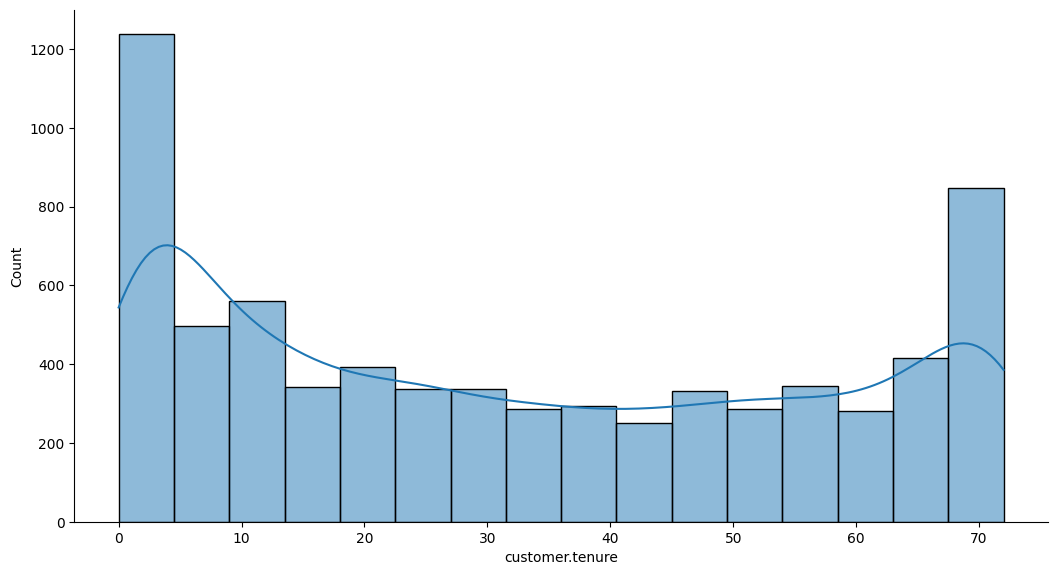

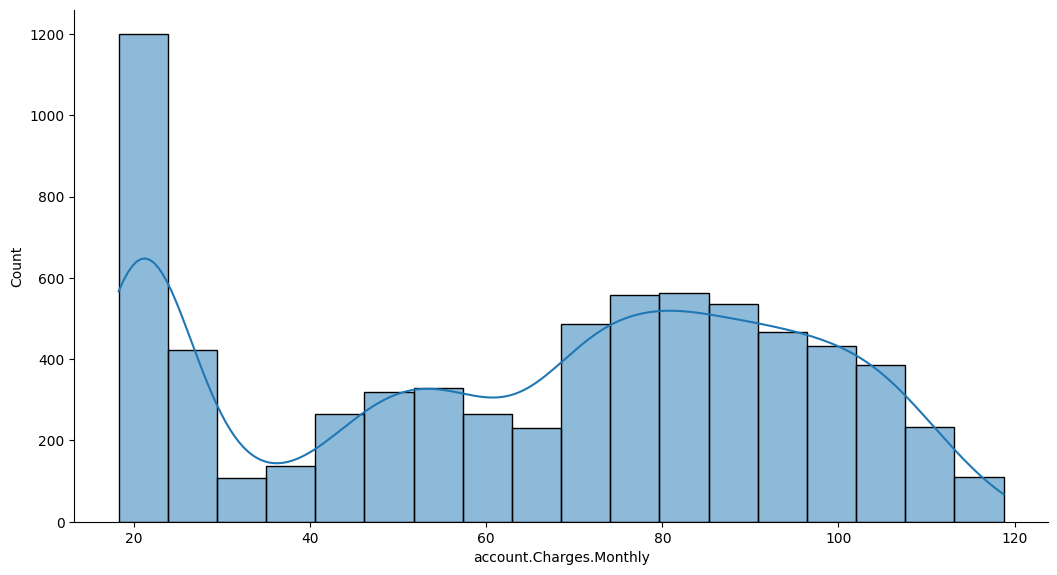

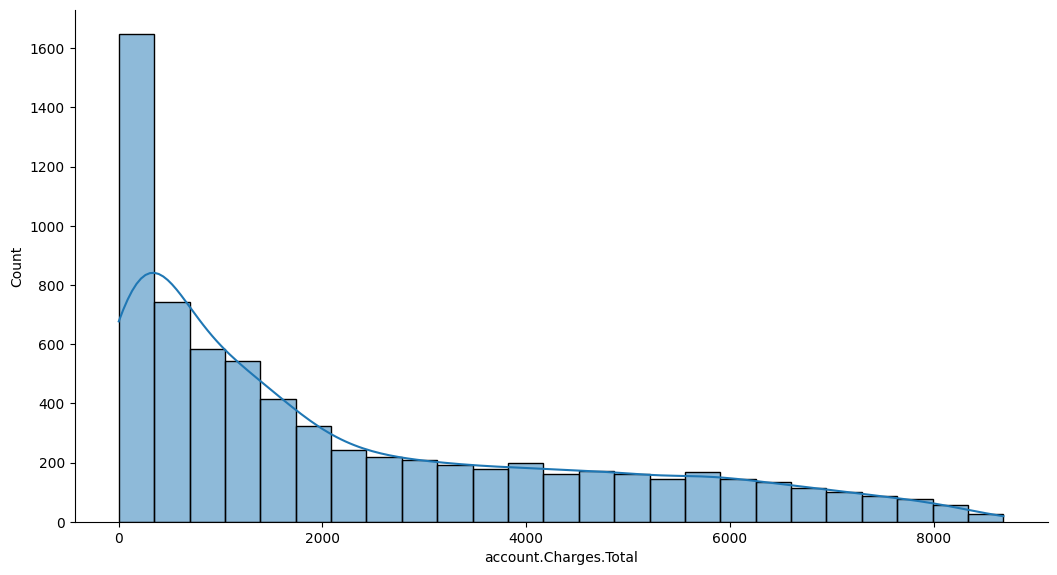

In [386]:
for col in Cuantitativa:
 ax=sns.displot(data=df,x=col,kde=True)
 ax.figure.set_size_inches(12,6)
 #ax.set_title(f'Distribución de {col}',fontsize=18)
 #ax.set_xlabel(col,fontsize=14)
 ax

AttributeError: 'FacetGrid' object has no attribute 'set_title'

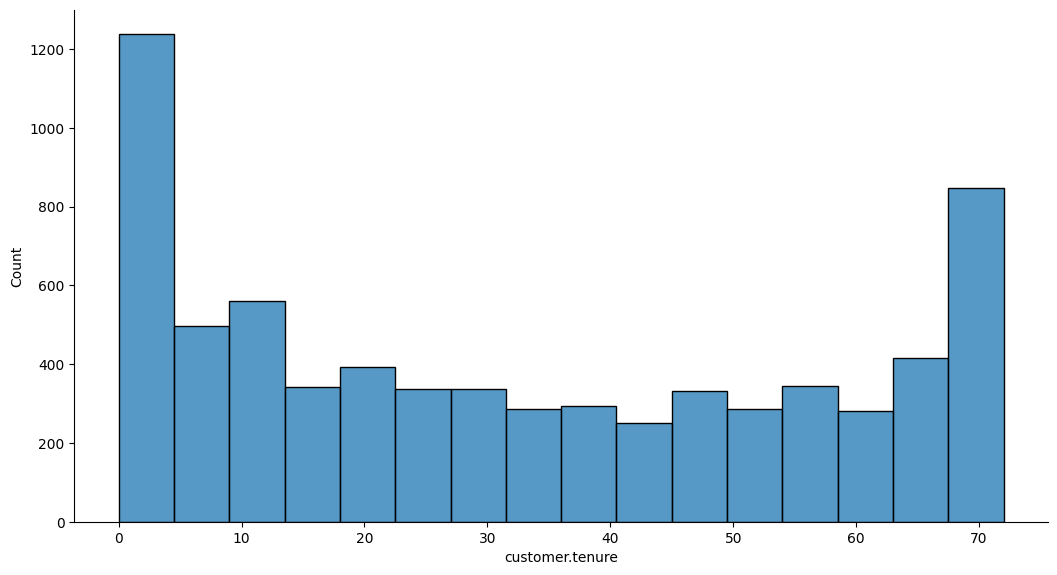

In [383]:
ax=sns.displot(data=df,x='customer.tenure',kde=False)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribución de tenure',fontsize=18)
ax.set_xlabel('Tenure',fontsize=14)
ax

In [ ]:
import pandas as pd

# Carga del CSV desde GitHub
url = 'https://raw.githubusercontent.com/Tecindes/ChallengeONE__/refs/heads/main/reporte.csv'
df = pd.read_csv(url)

# Vista general y revisión de nulos
print(df.info())
print(df.isnull().sum())

In [ ]:
df.describe().to_markdown("resumen_datos.md")

In [ ]:
# One-Hot Encoding (ideal si no hay demasiadas categorías)
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
df_encoded